In [1]:
#In this code, I will be trying to improve the Gaussian Naive Bayes accuracy score that I got without any feature engineering or model optimization.
#The accuracy score to beat is 0.809.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('cleaned_wine_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,8.311201,0.529816,0.271732,2.514886,0.088180,15.861459,46.477155,0.996714,3.310228,0.658924,10.429563,0.134119
std,1.738199,0.182954,0.195052,1.334976,0.049392,10.421941,32.171729,0.001865,0.154722,0.170697,1.080481,0.340906
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [5]:
X_raw = df.drop(['quality'], axis=1)
Y = df['quality']

scaler = StandardScaler()

X = scaler.fit_transform(X_raw)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

In [7]:
def modelaccuracy(model):
    model.fit(X_train, Y_train)
    result = accuracy_score(Y_test, (model.predict(X_test)))
    print(f'Model Accuracy is {result}')

In [8]:
#The accuracy of the model without any transformation.

nbc = GaussianNB()

modelaccuracy(nbc)

Model Accuracy is 0.8088235294117647


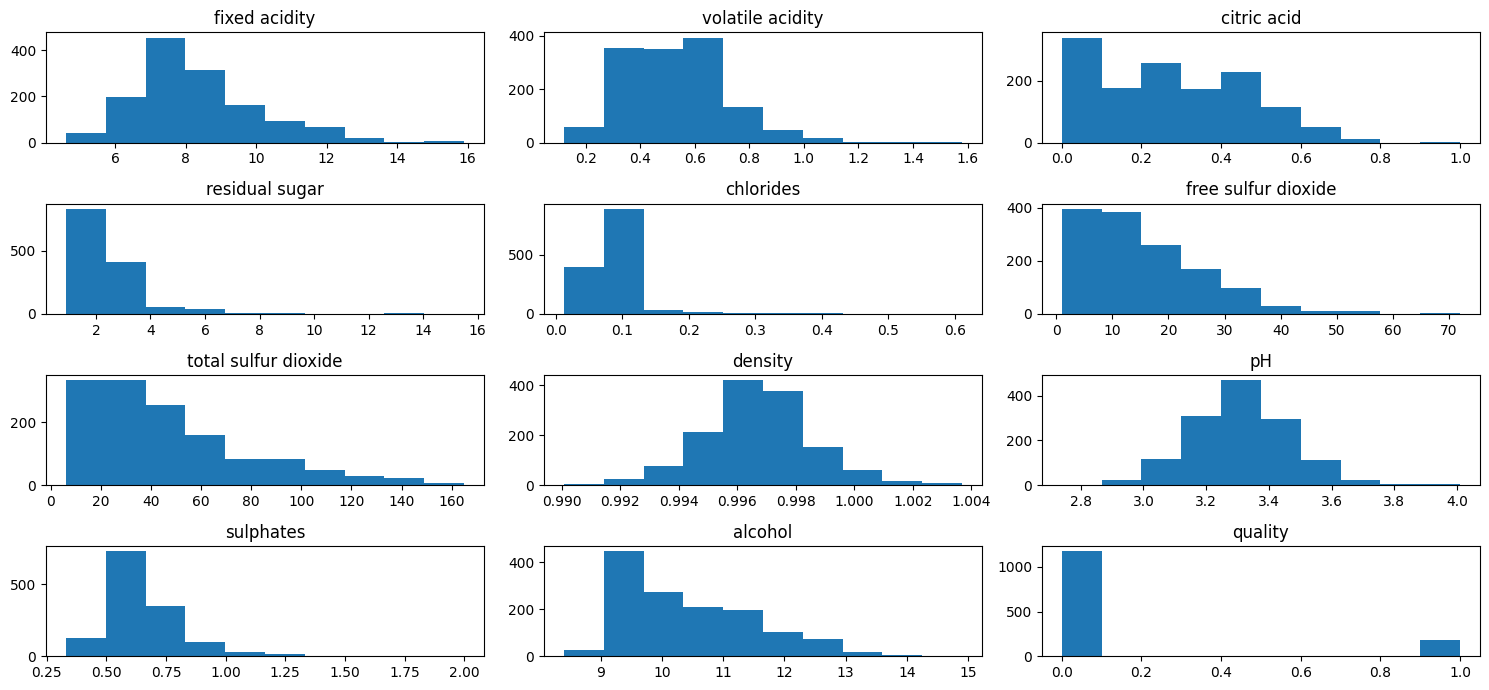

In [9]:
#Seeing the distributions of each feature.

fig, axs = plt.subplots(4, 3, figsize=(15,7), layout='tight')

columns = df.columns

for ax, title in zip(axs.flat, columns):
    ax.hist(df[title])
    ax.set_title(title)

In [10]:
#Creating a function to make a Q-Q-Plot

def qq_plot(df, variable):
    plt.figure(figsize=(10,3))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.title(f'Distribution of {variable}')

    plt.show()

In [11]:
#Creating a function to run each feature through the qq_plot function for every transformation I want to try. 

def transformation_test(dataframe, variable):
    qq_plot(df, variable)

    dataframe[f'Log_{variable}'] = np.log(df[variable] + 0.00001)
    qq_plot(dataframe, f'Log_{variable}')

    dataframe[f'Rec_{variable}'] = 1/(df[variable] + 0.00001)
    qq_plot(dataframe, f'Rec_{variable}')

    dataframe[f'Sqr_{variable}'] = df[variable]**(1/2)
    qq_plot(dataframe, f'Sqr_{variable}')
    
    dataframe[f'Exp_{variable}'] = df[variable]**(1/1.2)
    qq_plot(dataframe, f'Exp_{variable}')

    dataframe[f'BoxCox_{variable}'], param = stats.boxcox(df[variable] + 0.0001)
    qq_plot(dataframe, f'BoxCox_{variable}')

    dataframe.drop([f'Log_{variable}', f'Rec_{variable}', f'Sqr_{variable}', f'Exp_{variable}', F'BoxCox_{variable}'], axis=1, inplace=True)

In [12]:
df2 = df.copy()

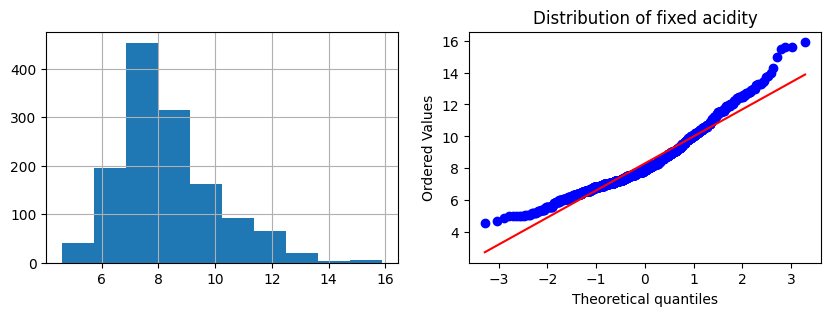

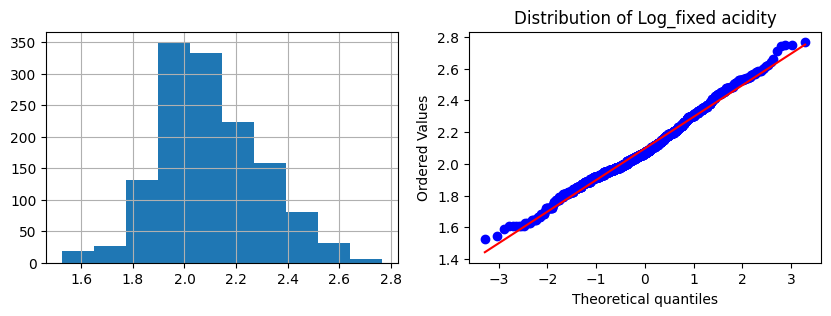

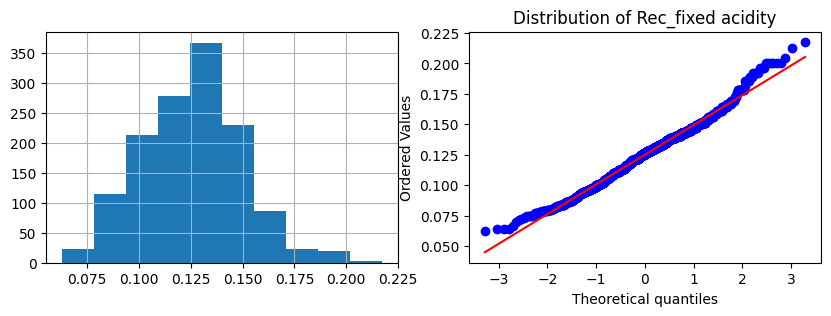

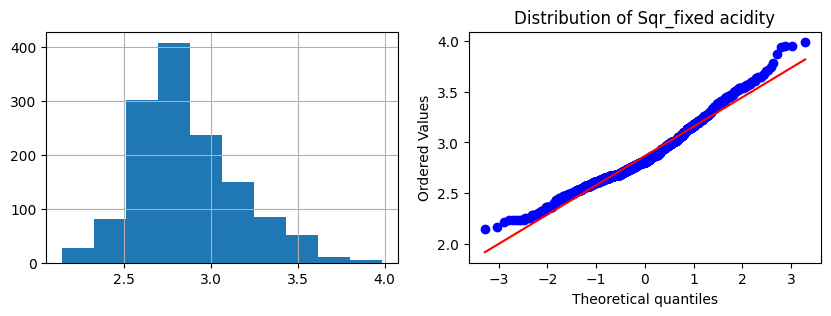

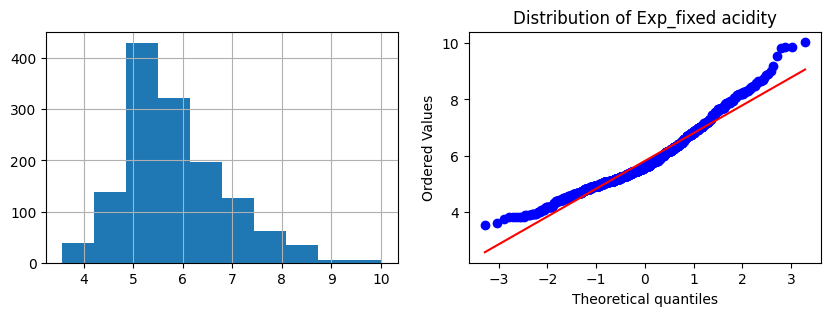

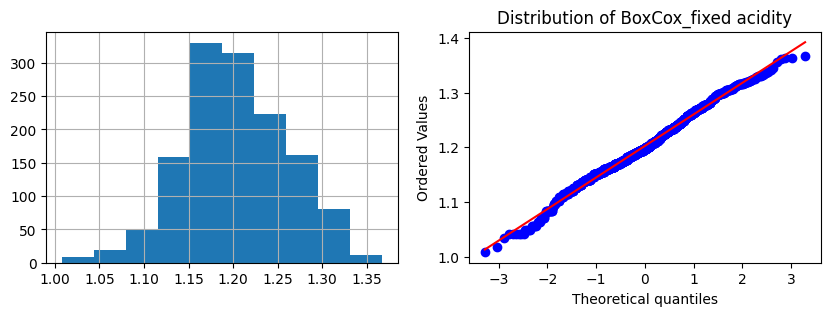

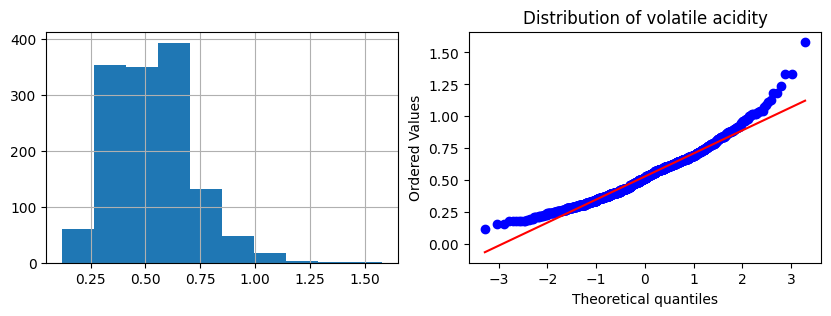

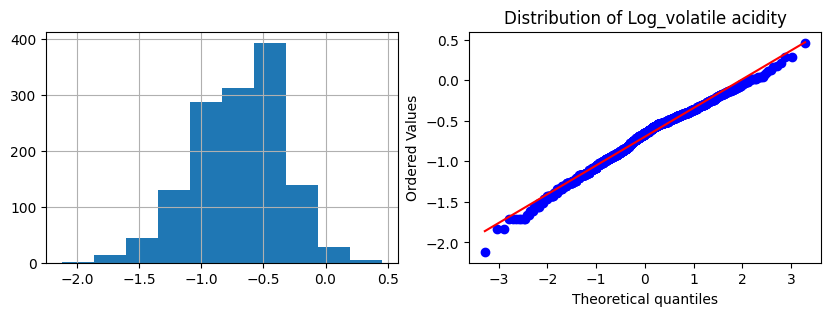

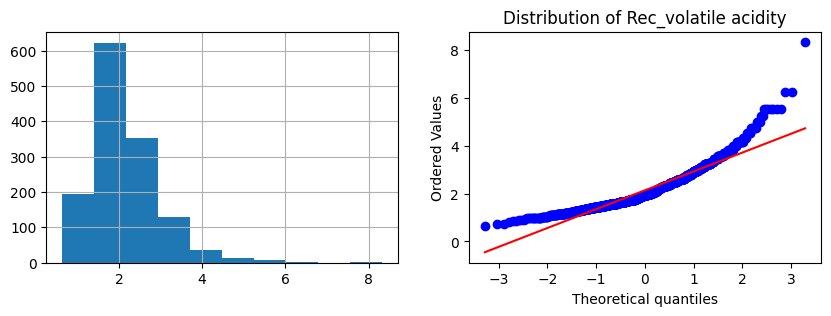

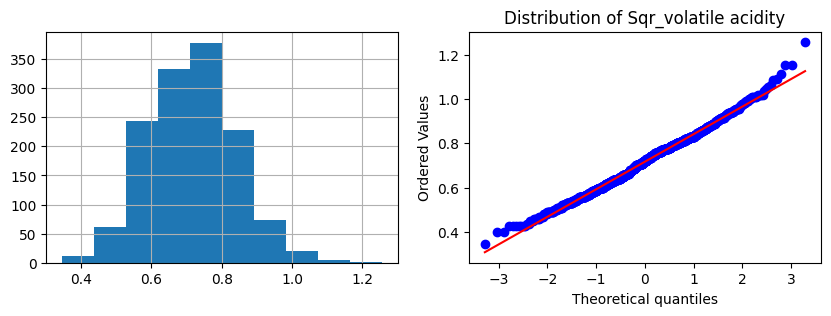

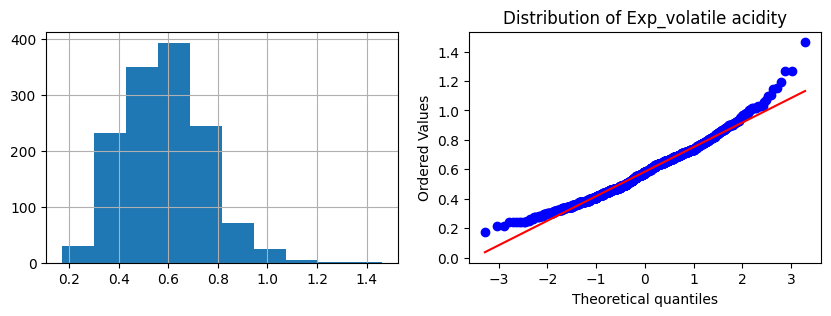

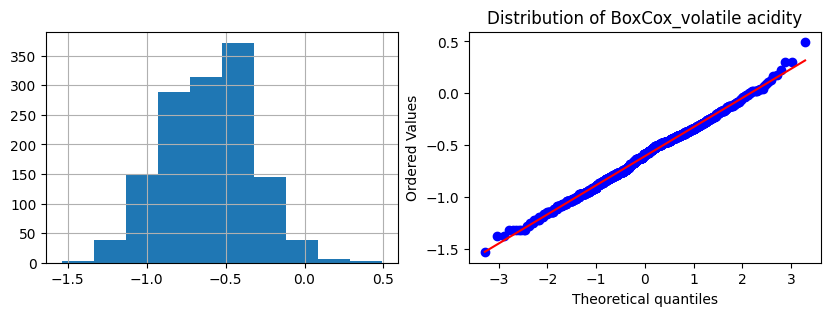

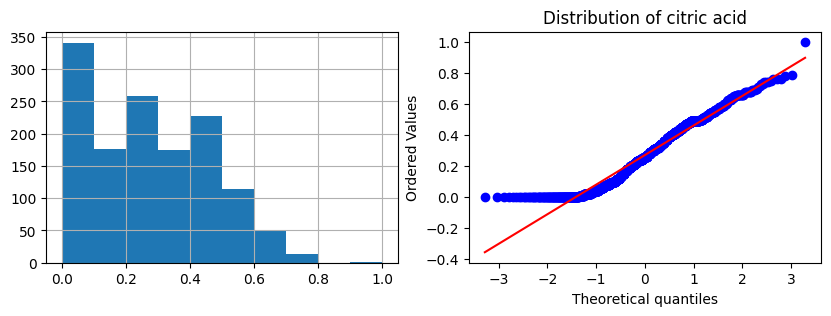

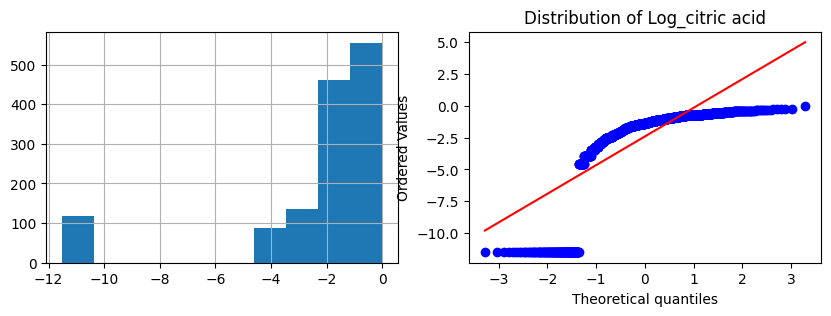

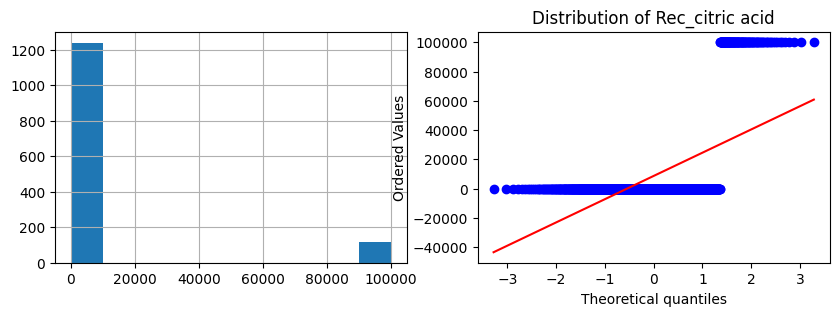

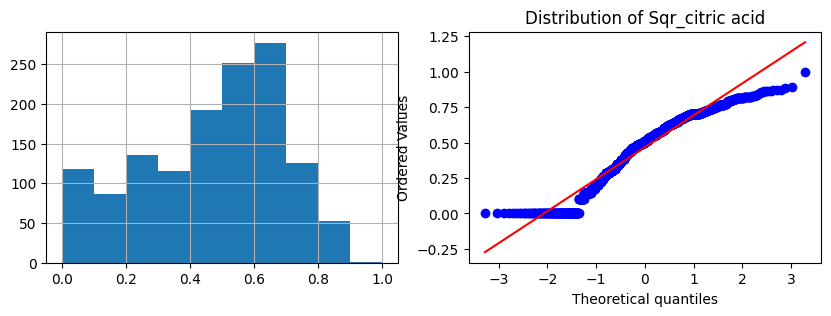

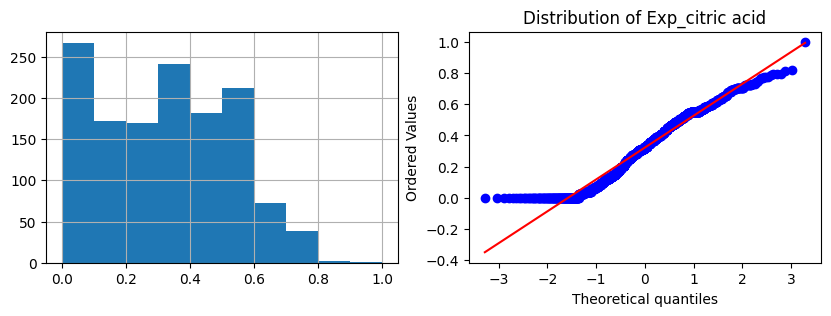

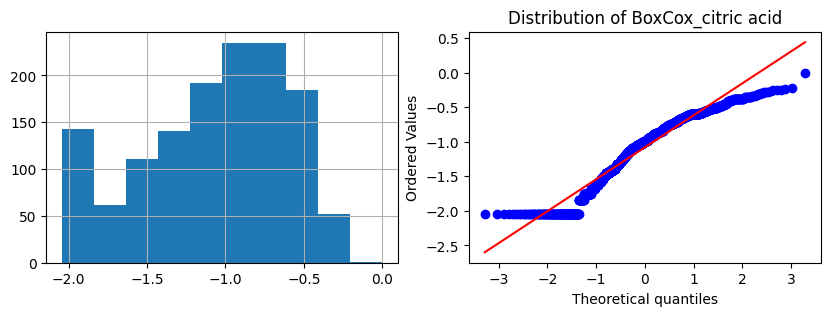

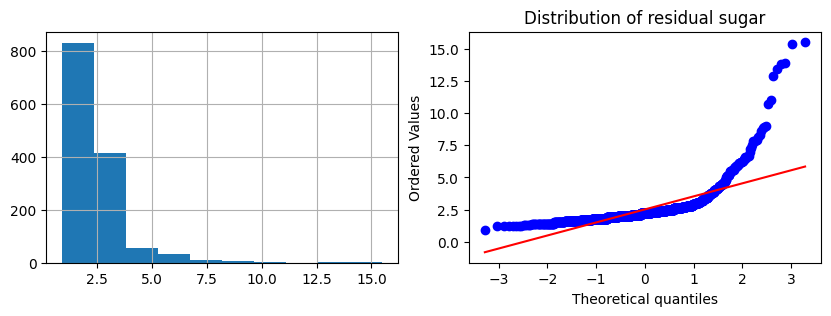

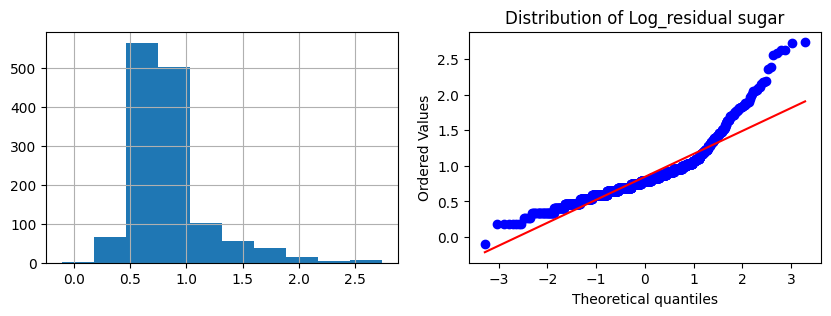

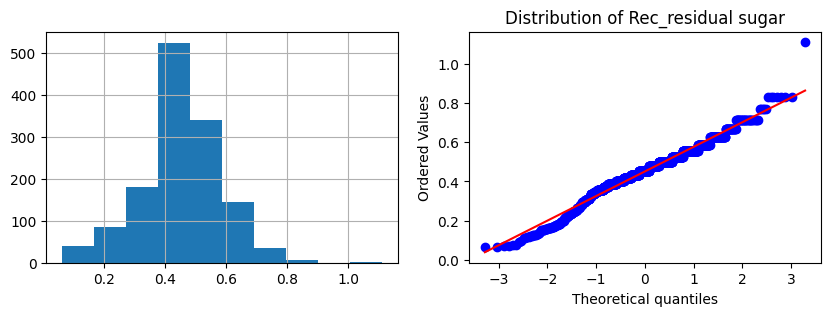

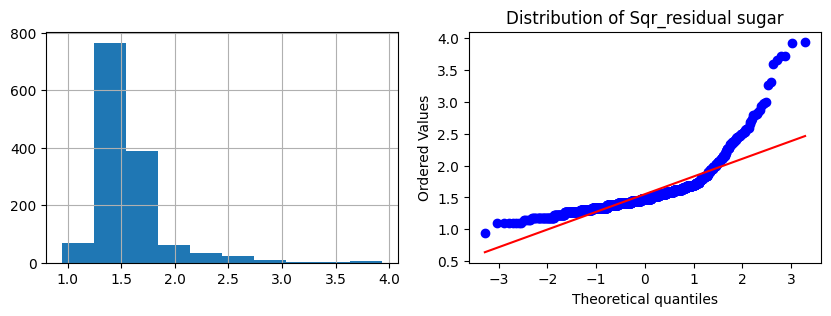

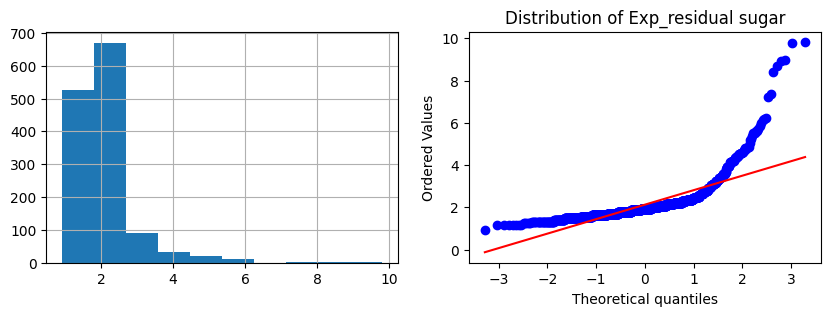

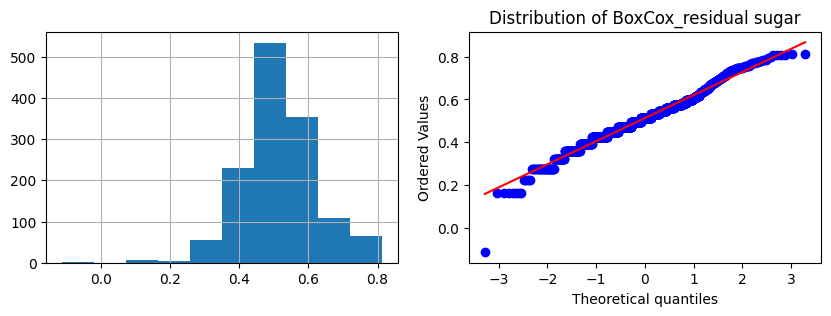

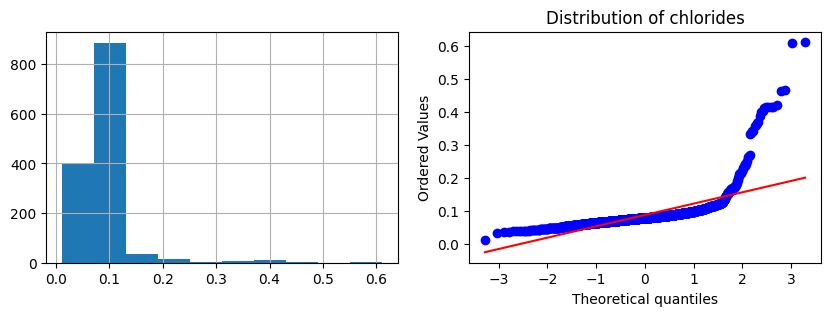

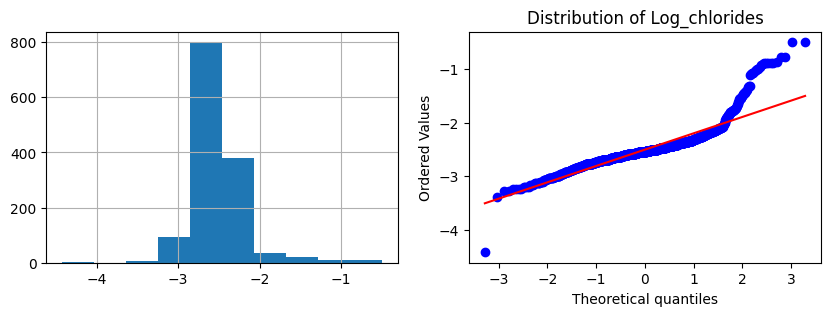

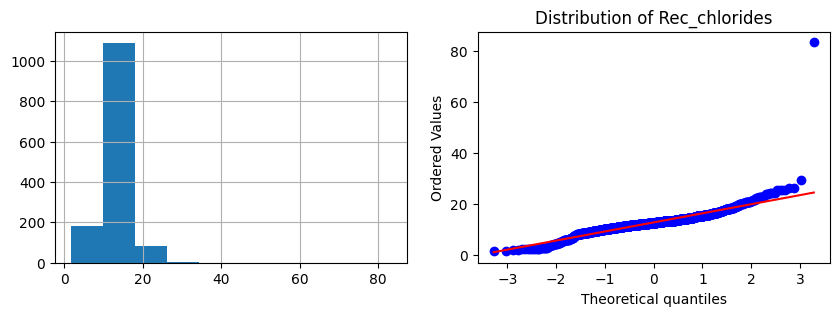

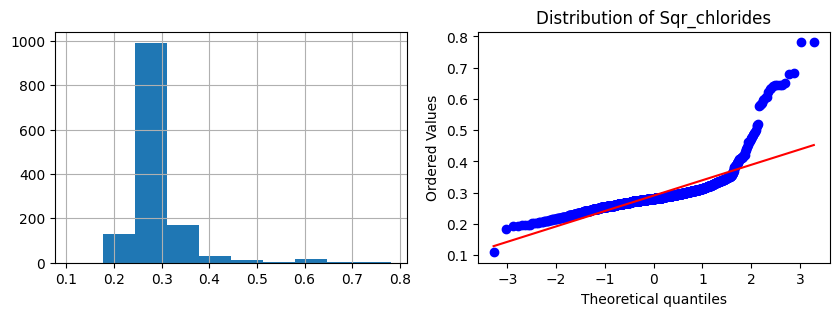

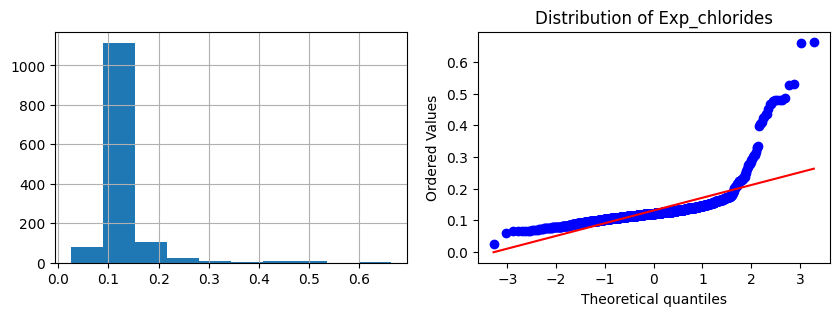

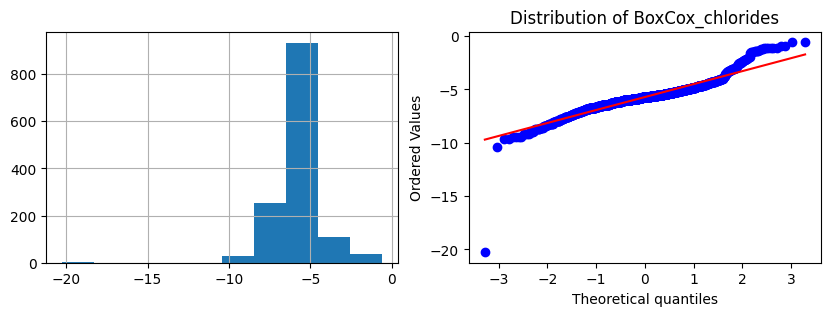

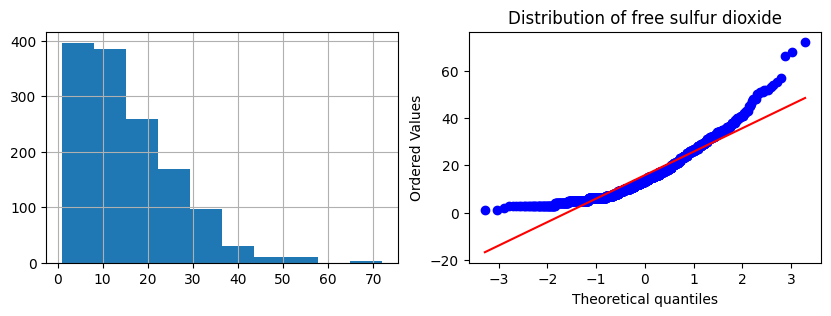

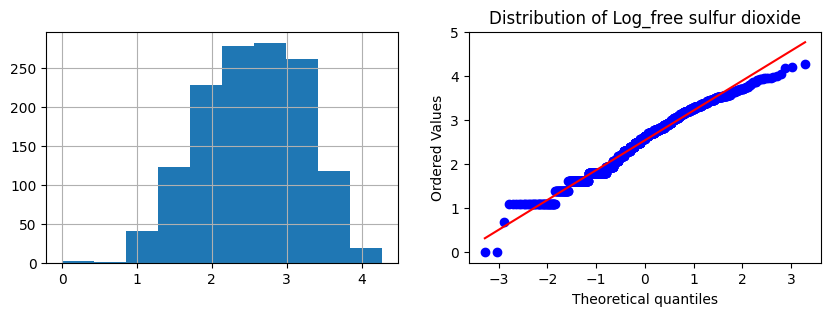

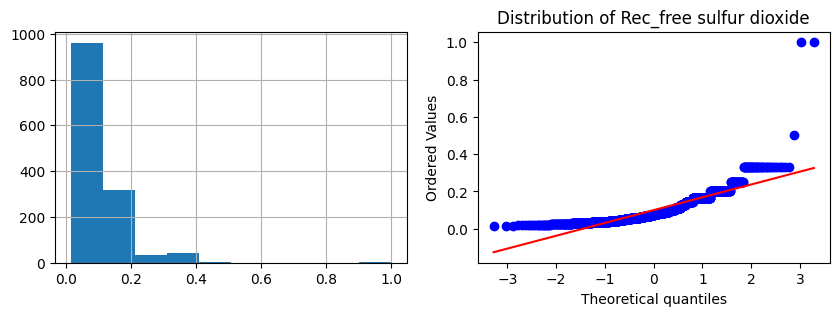

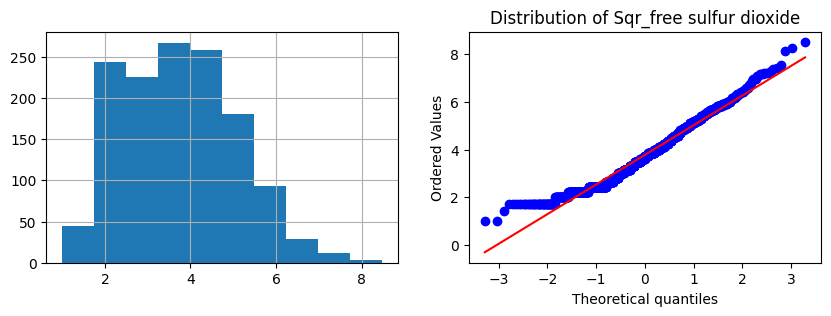

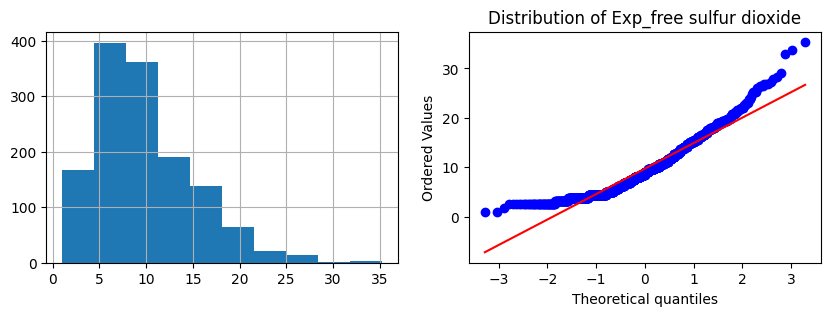

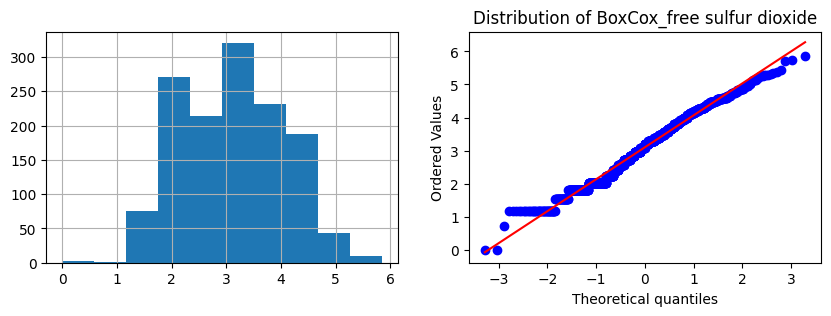

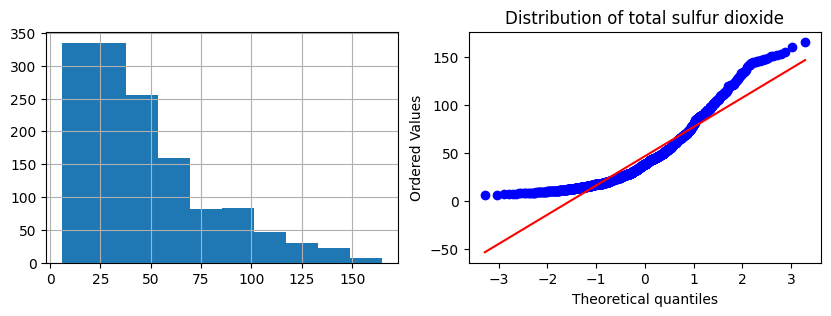

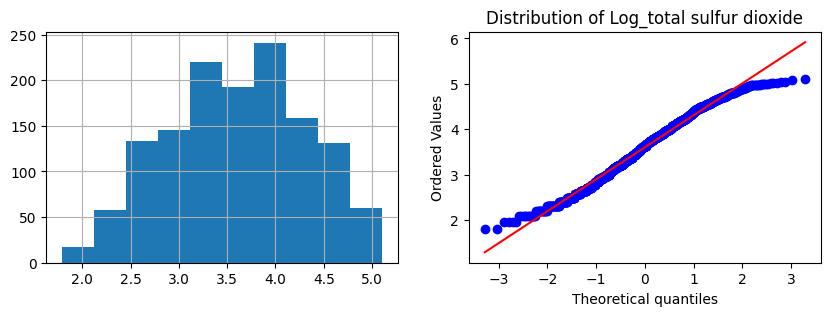

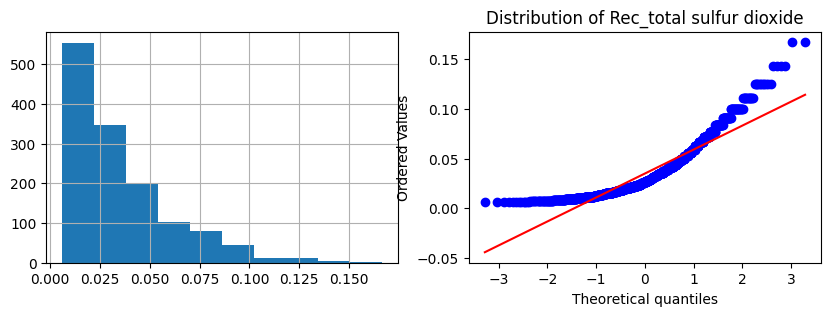

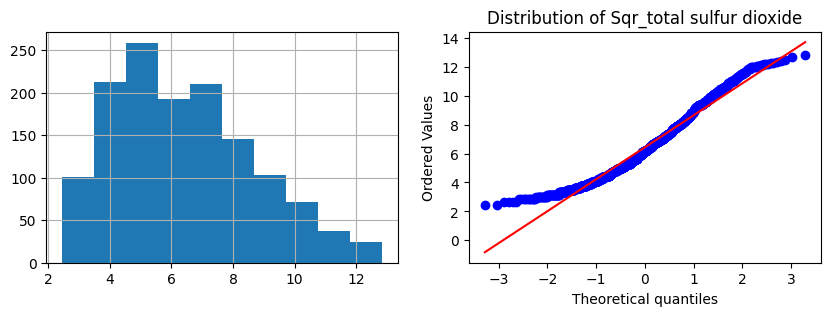

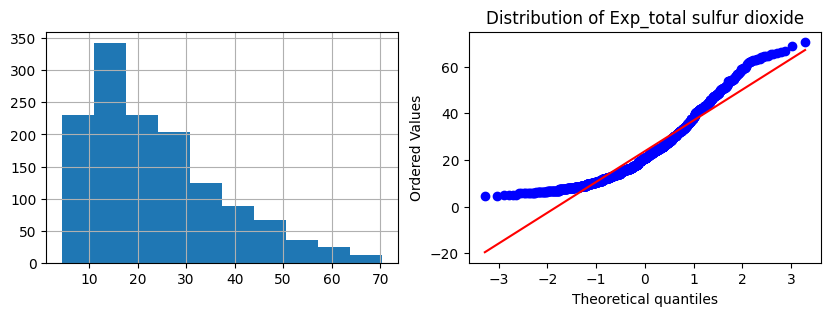

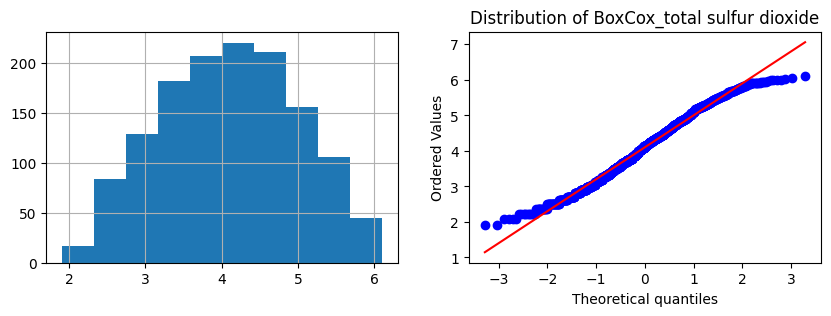

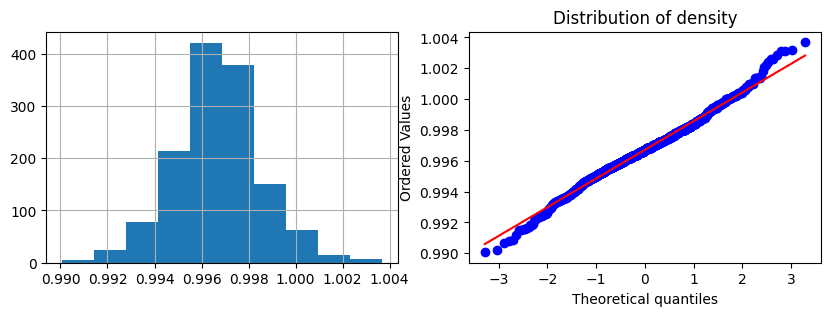

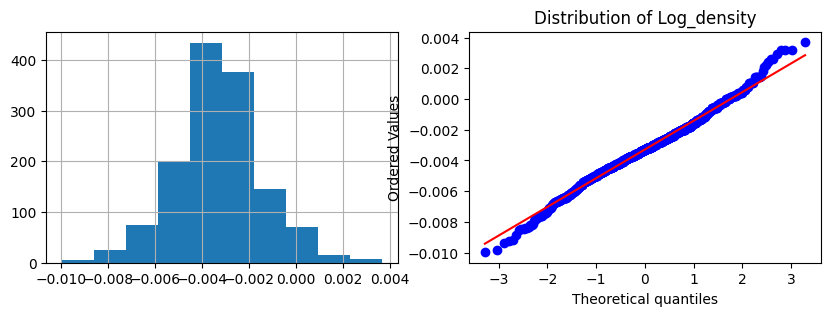

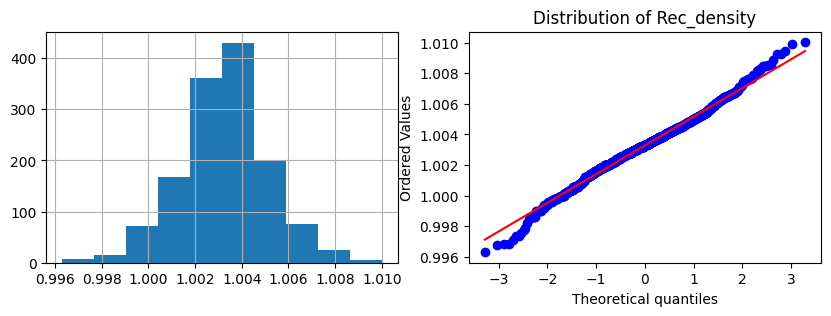

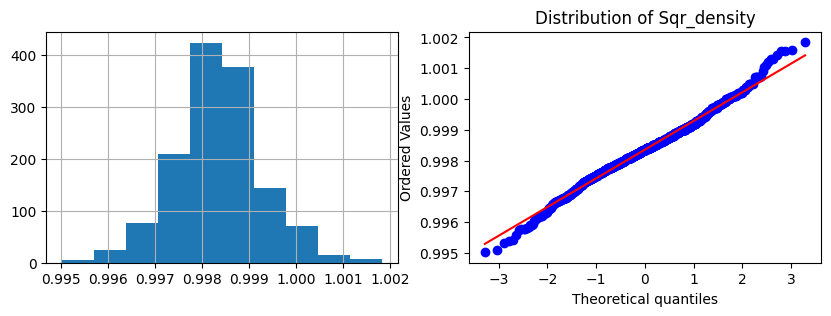

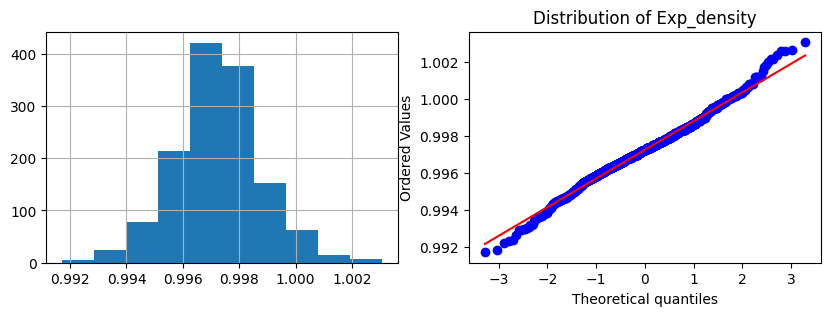

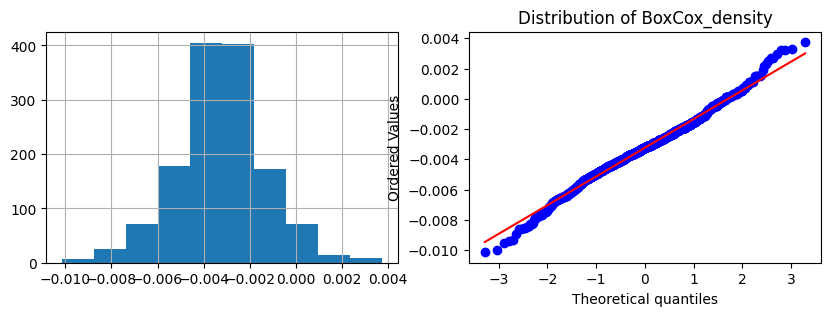

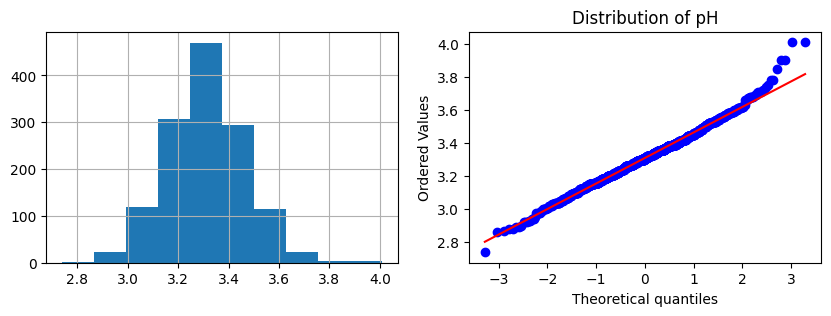

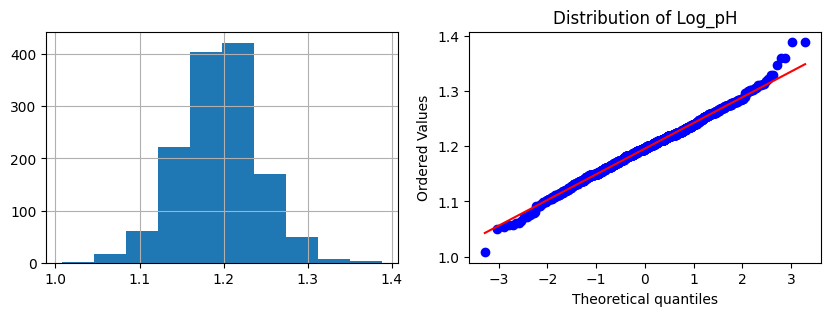

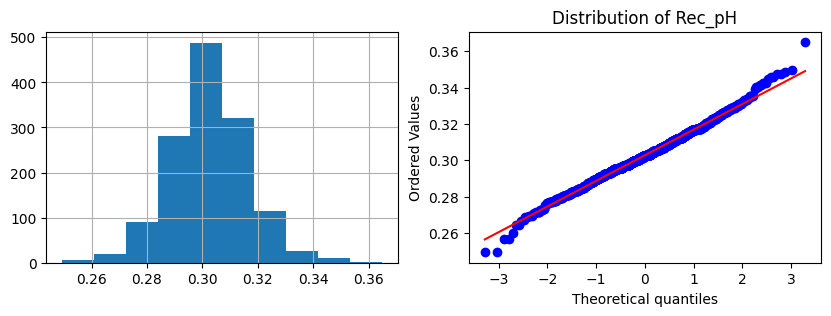

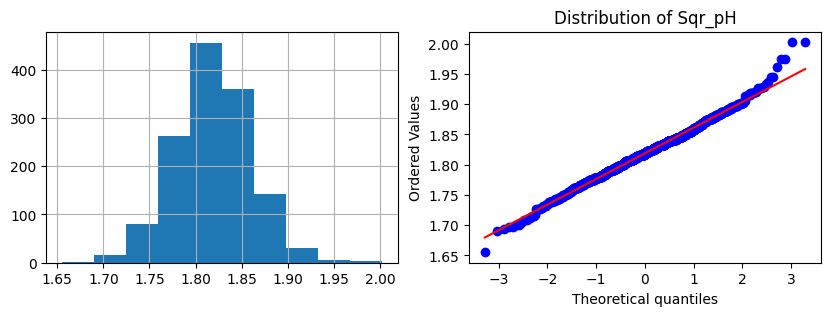

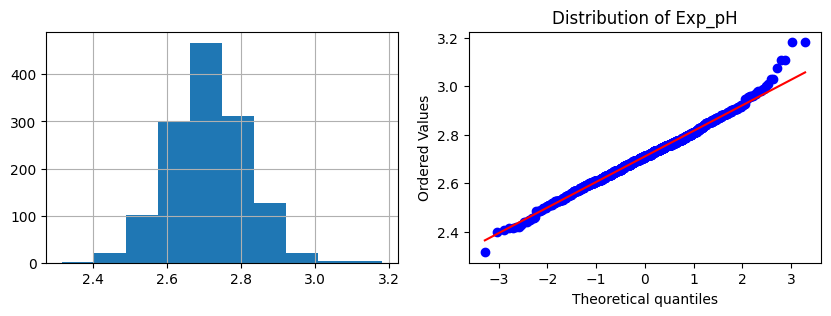

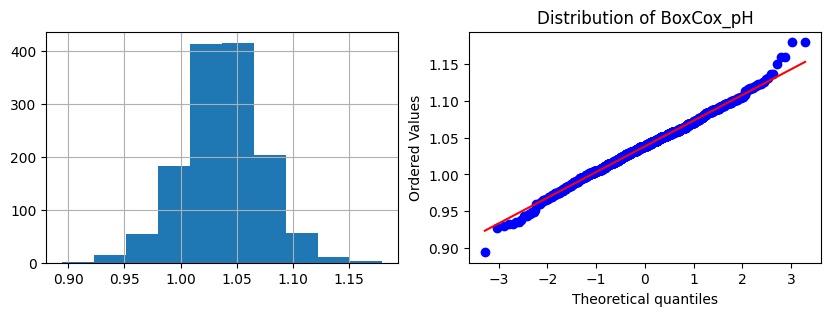

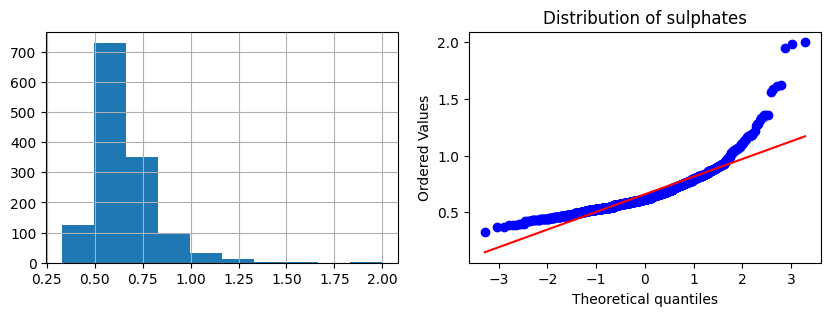

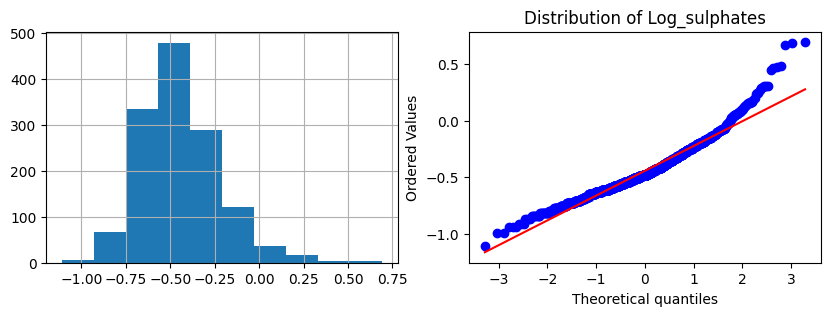

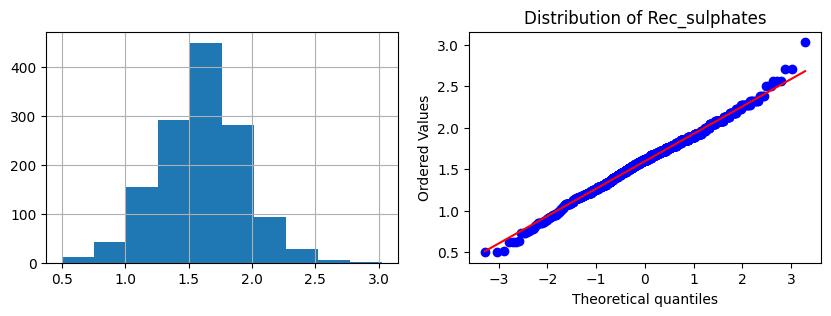

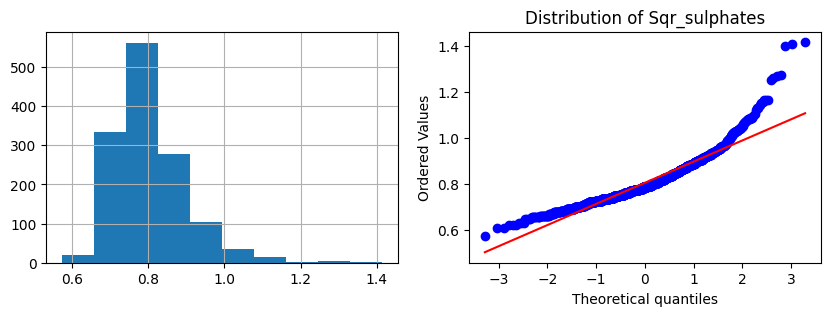

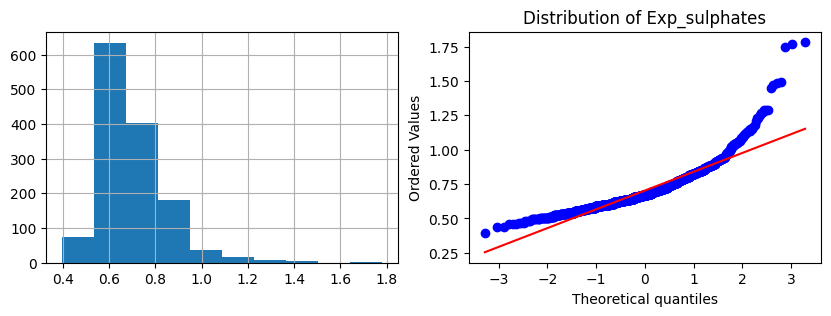

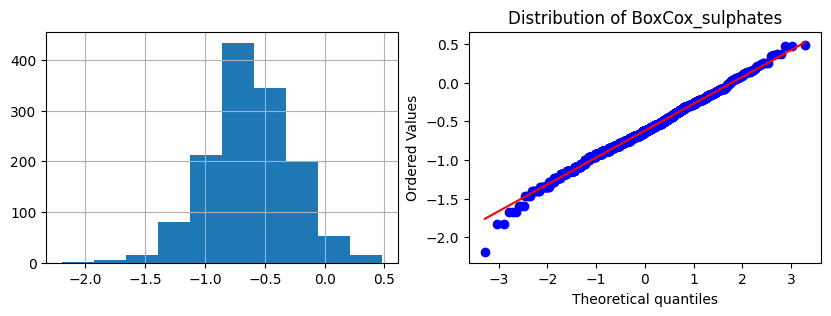

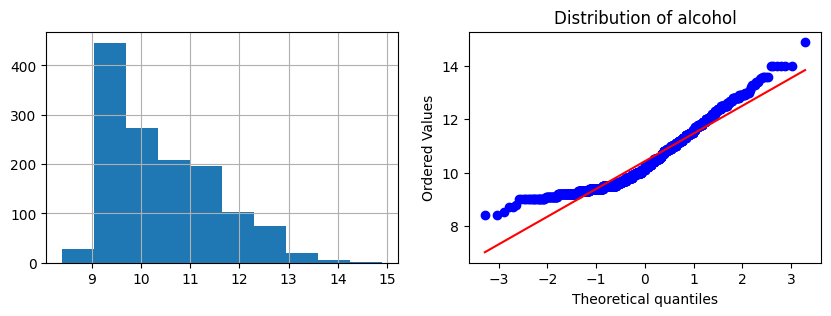

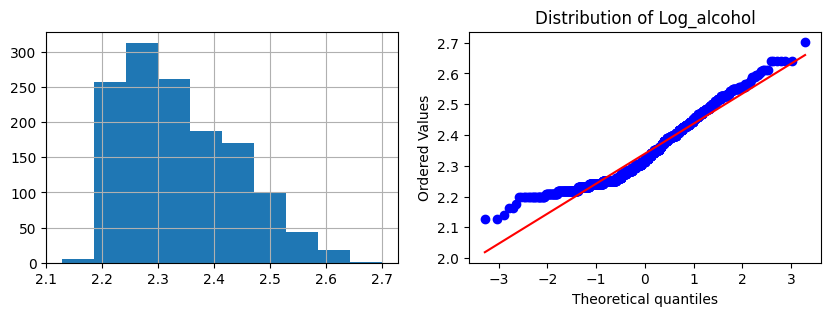

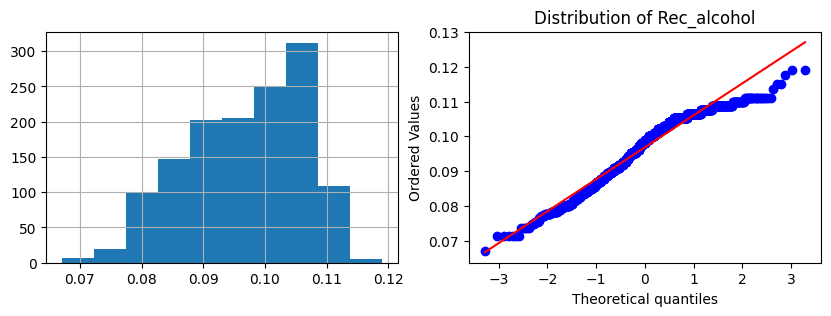

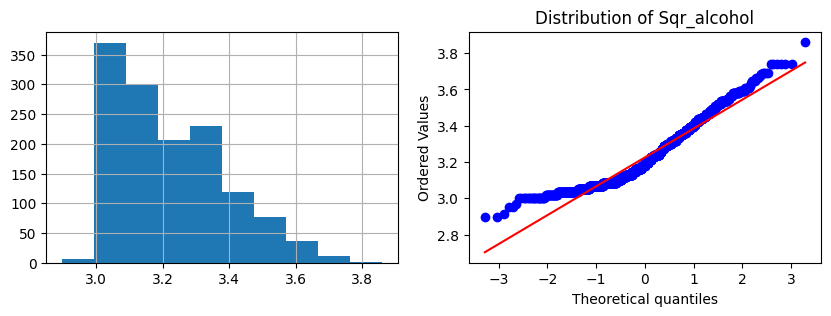

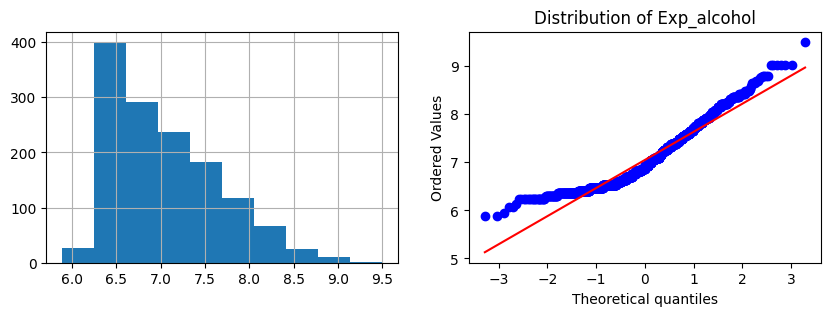

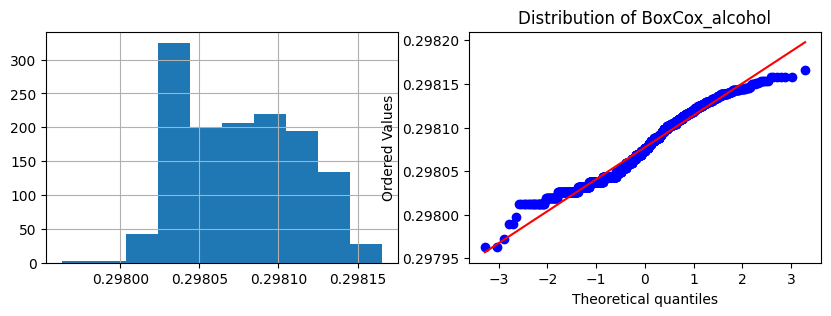

In [13]:
#Running each feature through the created functions to compare the effectiveness of each transformation. 
#Using these graphs I will pick the best transformation for each and apply it to our original df.

temp_df2 = df2.drop('quality', axis=1)

for i in temp_df2:
    transformation_test(df2, i)

In [14]:
#Using the graphs above, I will not pick the best transformation for each feature to make the distributions normal.
#I left 'citric acid','density', and 'pH' as they were because none of the transformations I tested produced significantly better results.

In [15]:
df2['fixed acidity'], param = stats.boxcox(df2['fixed acidity'])
df2['volatile acidity'], param = stats.boxcox(df2['volatile acidity'])
df2['residual sugar'] = 1/df2['residual sugar']
df2['chlorides'] = 1/df2['chlorides']
df2['free sulfur dioxide'] = df2['free sulfur dioxide']**(1/2)
df2['total sulfur dioxide'] = np.log(df2['total sulfur dioxide'])
df2['sulphates'] = 1/df2['sulphates']
df2['alcohol'], param = stats.boxcox(df2['alcohol'])

In [16]:
X_new = df2.drop(['quality'], axis=1)
Y_new = df2['quality']

X_new = scaler.fit_transform(X_new)

X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y_new, random_state=42, test_size=0.2)

In [17]:
#With the data standardized, I was able to improve the model's accuracy by ~0.054.

modelaccuracy(nbc)

Model Accuracy is 0.8639705882352942
